In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


Age : Age of the patient

Sex : Sex of the patient male=1, female=0

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina<br>
Value 2: atypical angina<br>
Value 3: non-anginal pain<br>
Value 4: asymptomatic <br><br>
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [2]:
df1=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df2=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/o2Saturation.csv')
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
frames = [df1,df2]
result = pd.concat(frames)
result.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,NaN
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,NaN
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,NaN
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,NaN
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,NaN


In [4]:
df1=df1.rename(columns={'age':'Age','sex':'Sex','cp':'Chest Pain Type','trtbps':'Resting Blood Pressure','chol':'Cholesterol','fbs':'Fasting Blood Sugar','rest_ecg':'Resting ECG','thalachh':'Max Heart Rate','exng':'EIA'})
df1.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,restecg,Max Heart Rate,EIA,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# df1['Chest Pain Type'] = df1['Chest Pain Type'].map({'0':'Typical Angina' ,'1':'Atypical Angina','2':'Non-Anginal Pain','3':'Asymptomatic'})
df1 = df1.replace({'Chest Pain Type': {0:'Typical Angina' ,1:'Atypical Angina',2:'Non-Anginal Pain',3:'Asymptomatic'}})
df1.head()
df1=df1.replace({'EIA':{0:False,1:True}})
df1=df1.replace({'Sex':{1:'Male',0:'Female'}})

[Text(0.5, 0, '1=Male, 0=Female'),
 Text(0, 0.5, 'Counts'),
 Text(0.5, 1.0, 'Gender distribution')]

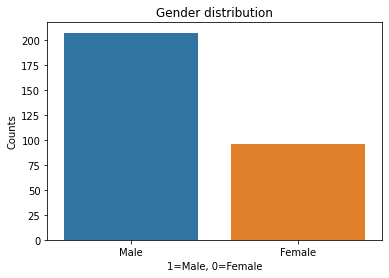

In [6]:
import seaborn as sns
ax=sns.countplot(x='Sex', data=df1)
ax.set(xlabel='1=Male, 0=Female',ylabel='Counts',title='Gender distribution')

## Gender distribution of people having Exercise Induced Asthama

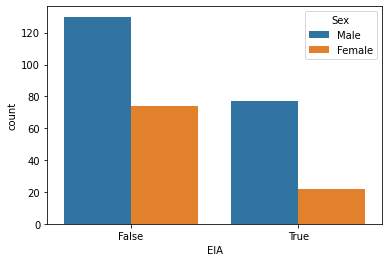

In [7]:
ax=sns.countplot(x='EIA',hue='Sex',data=df1)

In case of Exercise Induced Asthama, more men are affected by it in comparision to women.

## Distribution of Chest Pain Type

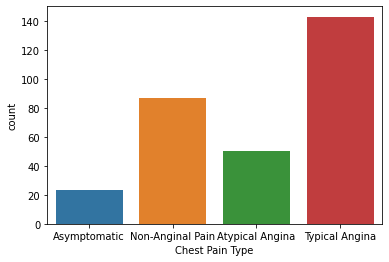

In [8]:
ax=sns.countplot(x='Chest Pain Type', data=df1)

In [9]:
cholesterol1=[];
for index,row in df1.iterrows():
    k= df1.loc[index,'Cholesterol']
    if(k>=250):
        cholesterol1.append(k)

In [10]:
df1.describe()

,Age,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,restecg,Max Heart Rate,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,17.538143,51.830751,0.356198,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     303 non-null    int64  
 1   Sex                     303 non-null    object 
 2   Chest Pain Type         303 non-null    object 
 3   Resting Blood Pressure  303 non-null    int64  
 4   Cholesterol             303 non-null    int64  
 5   Fasting Blood Sugar     303 non-null    int64  
 6   restecg                 303 non-null    int64  
 7   Max Heart Rate          303 non-null    int64  
 8   EIA                     303 non-null    bool   
 9   oldpeak                 303 non-null    float64
 10  slp                     303 non-null    int64  
 11  caa                     303 non-null    int64  
 12  thall                   303 non-null    int64  
 13  output                  303 non-null    int64  
dtypes: bool(1), float64(1), int64(10), object(

## How cholesterol affects chest pain type?


[Text(0.5, 1.0, 'How cholesterol affects chest pain type')]

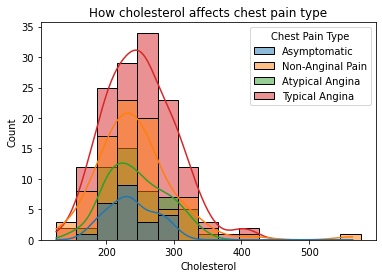

In [12]:
ax=sns.histplot(data=df1, x="Cholesterol", bins=5,binwidth=30, kde=True,hue='Chest Pain Type' )
ax.set(title='How cholesterol affects chest pain type')

## Relationship between Age and Cholesterol levels

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

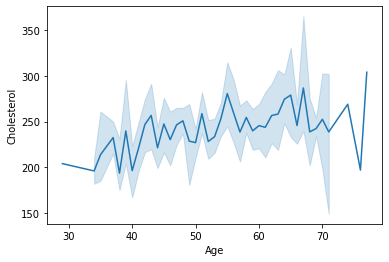

In [13]:
sns.lineplot(data=df1,x='Age',y='Cholesterol')

## Does the number of vessel coloured by fluoroscopy predict the increased risk of heart attack?

<AxesSubplot:xlabel='caa', ylabel='output'>

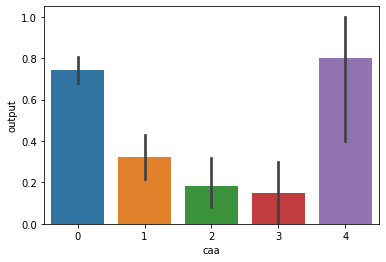

In [14]:
sns.barplot(x='caa',y='output', data =df1)

<AxesSubplot:xlabel='caa', ylabel='output'>

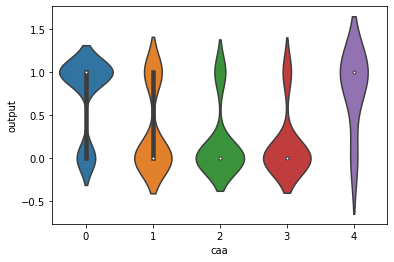

In [15]:
sns.violinplot(x='caa',y='output', data =df1)

<AxesSubplot:xlabel='Fasting Blood Sugar', ylabel='Resting Blood Pressure'>

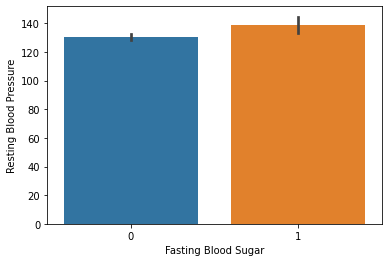

In [16]:
sns.barplot(x='Fasting Blood Sugar',y='Resting Blood Pressure', data =df1)

## To find correlation between various columns
Co-relation coefficient between two data
- Close to +1: Large Positive relationship
- Close to -1: Large Negative relationship
- Close to 0: No relationship

In [17]:
df1.corr()

,Age,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,restecg,Max Heart Rate,EIA,oldpeak,slp,caa,thall,output
Age,1.000000,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Resting Blood Pressure,0.279351,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting Blood Sugar,0.121308,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Max Heart Rate,-0.398522,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
EIA,0.096801,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slp,-0.168814,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
caa,0.276326,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724


## Relation between slp and oldpeak

<AxesSubplot:xlabel='slp', ylabel='oldpeak'>

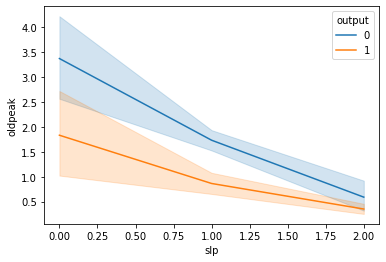

In [18]:
sns.lineplot(x='slp',y='oldpeak',hue='output',data=df1)

## How max heart rate affects the probability of having heart attack?
There's positive correlation co-efficient of 0.42 between them, so we can assume that having a higher heart rate is a factor contributing to heart attack.

<AxesSubplot:xlabel='output', ylabel='Max Heart Rate'>

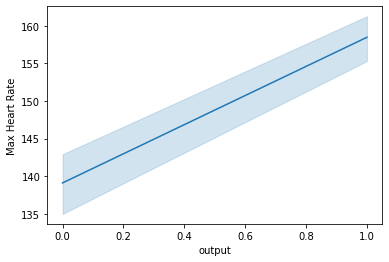

In [19]:
sns.lineplot(y='Max Heart Rate',x='output', data=df1)

In [28]:
agelist=[]
age_25_to_45=0
age_45_to_60=0
age_60_to_70=0
age_70_above=0
for index,row in df1.iterrows():
    age=df1.loc[index,'Age'] # Extract each age
    agelist.append(age)
    if(age>=25 and age <45):
        age_25_to_45+=1
    elif (age>=45 and age <60):
        age_45_to_60+=1
    elif (age>=60 and age<70):
        age_60_to_70+=1
    elif (age>=70):
        age_70_above+=1
        
print(agelist)

[63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 50, 58, 66, 43, 69, 59, 44, 42, 61, 40, 71, 59, 51, 65, 53, 41, 65, 44, 54, 51, 46, 54, 54, 65, 65, 51, 48, 45, 53, 39, 52, 44, 47, 53, 53, 51, 66, 62, 44, 63, 52, 48, 45, 34, 57, 71, 54, 52, 41, 58, 35, 51, 45, 44, 62, 54, 51, 29, 51, 43, 55, 51, 59, 52, 58, 41, 45, 60, 52, 42, 67, 68, 46, 54, 58, 48, 57, 52, 54, 45, 53, 62, 52, 43, 53, 42, 59, 63, 42, 50, 68, 69, 45, 50, 50, 64, 57, 64, 43, 55, 37, 41, 56, 46, 46, 64, 59, 41, 54, 39, 34, 47, 67, 52, 74, 54, 49, 42, 41, 41, 49, 60, 62, 57, 64, 51, 43, 42, 67, 76, 70, 44, 60, 44, 42, 66, 71, 64, 66, 39, 58, 47, 35, 58, 56, 56, 55, 41, 38, 38, 67, 67, 62, 63, 53, 56, 48, 58, 58, 60, 40, 60, 64, 43, 57, 55, 65, 61, 58, 50, 44, 60, 54, 50, 41, 51, 58, 54, 60, 60, 59, 46, 67, 62, 65, 44, 60, 58, 68, 62, 52, 59, 60, 49, 59, 57, 61, 39, 61, 56, 43, 62, 63, 65, 48, 63, 55, 65, 56, 54, 70, 62, 35, 59, 64, 47, 57, 55, 64, 70, 51, 58, 60, 77, 35, 70, 59, 64, 57, 56, 48, 56, 66, 54, 69,

<AxesSubplot:xlabel='Age', ylabel='Count'>

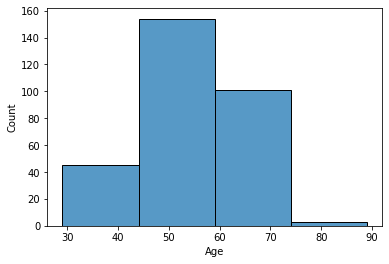

In [44]:
sns.histplot(data=df1, x='Age',bins=5, binwidth=15)

In [45]:
print('Displaying no. of people in each age category')
print('Age more than 25 and less than 45:', age_25_to_45)
print('Age more than 45 and less than 60:', age_45_to_60)
print('Age more than 60 and less than 70:', age_60_to_70)
print('Age more than 70:', age_70_above)

Displaying no. of people in each age category
Age more than 25 and less than 45: 56
Age more than 45 and less than 60: 157
Age more than 60 and less than 70: 80
Age more than 70: 10
